# Covid19PYColombia Module - Examples
covid19builderdf  is a module to construct a dataframe with covid19 data for Colombia
The class Covid19Builder provides a object from class Covid19PyColombia which has two methods:
- buildTotalDF() for retrieving historical Data
- buildByDate() for retrieving data of a specific date. By default return data of today.


In [1]:
from covid19builderdf  import Covid19Builder

builder = Covid19Builder()
covid19 = builder.buildTotalDF()

PlotAll() shows a line plotting the total confirmed cases throughout the days”

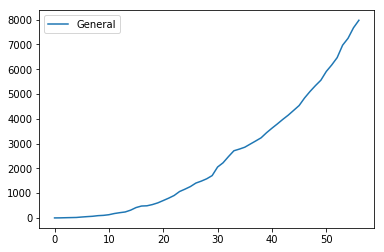

In [2]:
covid19.plotAll()

In [3]:
print('Total: {} confirmed cases'.format(covid19.getAllData().tail(1).values[0]))

Total: 7973 confirmed cases


The method plotByDeptTopN(n) gets Top N Departments with most cases

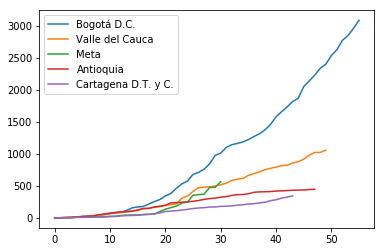

In [4]:
covid19.plotByDeptTopN(5)

The method plotByDept([]) takes a list of departments as parameter and makes a chart with lines for each department

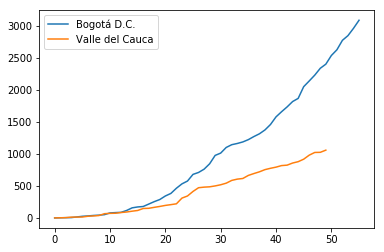

In [5]:
covid19.plotByDept([covid19.bogota,'Valle del Cauca',])

The method plotCities(n) gets Top N Cities with most cases

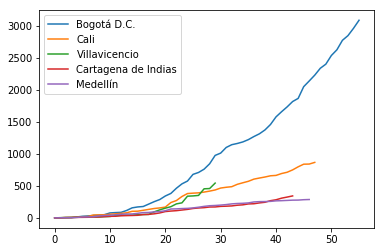

In [6]:
covid19.plotByCityTopN(5)

The method plotByCity([]) takes a list of cities as parameter and makes a chart with lines for each city

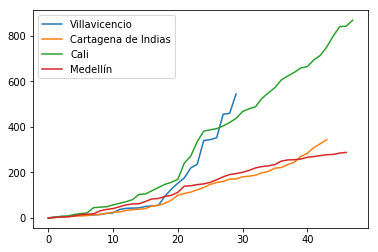

In [7]:
covid19.plotByCity(['Villavicencio','Cartagena de Indias','Cali','Medellín'])

Below there are additional methods to plot data about age, genre and health  

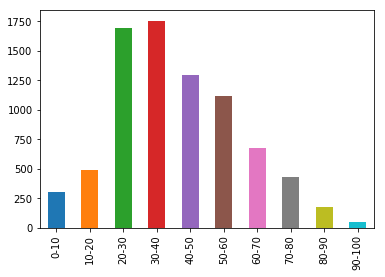

In [8]:
covid19.plotAge()

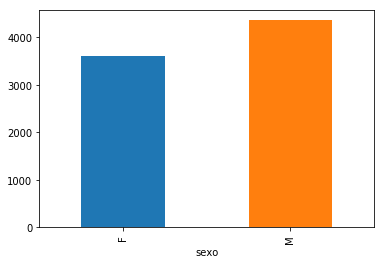

In [9]:
covid19.plotGenre()

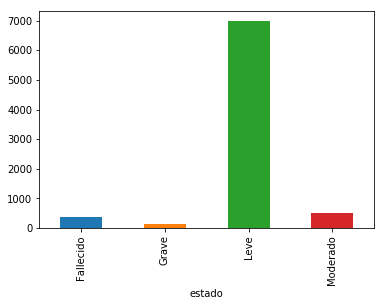

In [10]:
covid19.plotStatus()

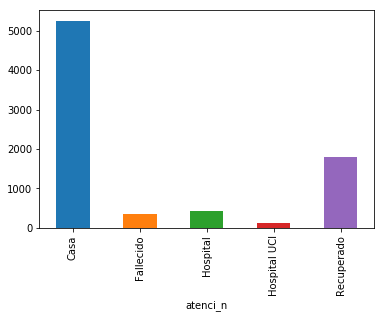

In [11]:
covid19.plotAttention()

Using the method builder.buildByDate() for fetching data of today

In [12]:
covid19_today  = builder.buildByDate()

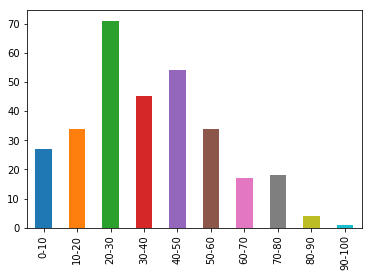

In [13]:
covid19_today.plotAge()

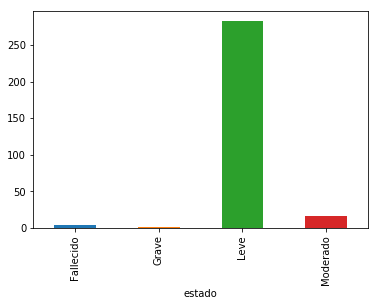

In [14]:
covid19_today.plotStatus()

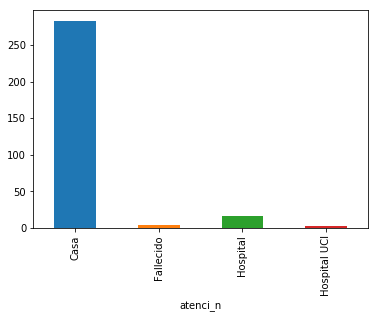

In [15]:
covid19_today.plotAttention()

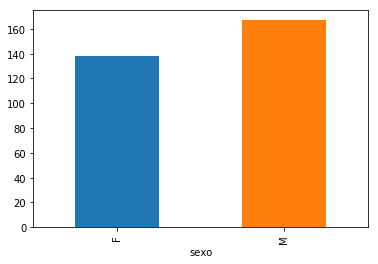

In [16]:
covid19_today.plotGenre()